### Soil data column index
- fips: US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
- lat: Latitude -->
- lon: Longitude
- elevation: Median elevation (meters)
- slope1: 0 % ≤ slope ≤ 0.5 %
- slope2: 0.5 % ≤ slope ≤ 2 %
- slope3: 2 % ≤ slope ≤ 5 %
- slope4: 5 % ≤ slope ≤ 10 %
- slope5: 10 % ≤ slope ≤ 15 %
- slope6: 15 % ≤ slope ≤ 30 %
- slope7: 30 % ≤ slope ≤ 45 %
- slope8: Slope > 45 %
- aspectN: North: 0˚< aspect ≤45˚ or 315˚< aspect ≤360˚
- aspectE: East: 45˚ < aspect ≤ 135
- aspectS: South: 135˚ < aspect ≤ 225˚
- aspectW: West: 225˚ < aspect ≤ 315˚
- aspectUnknown: Undefined: Slope aspect undefined; this value is used for grids where slope gradient is undefined or slope gradient is less than 2%.
- WAT_LAND: mapped water bodies
- NVG_LAND: barren/very sparsely vegetated land
- URB_LAND: built-up land (residential and infrastructure)
- GRS_LAND: grass/scrub/woodland
- FOR_LAND: forest land, calibrated to FRA2000 land statistics
- CULTRF_LAND: 
- CULTIR_LAND: irrigated cultivated land, according to GMIA 4.0
- CULT_LAND: total cultivated land
- SQ1: Nutrient availability
- SQ2: Nutrient retention capacity
- SQ3: Rooting conditions
- SQ4: Oxygen availability to roots
- SQ5: Excess salts.
- SQ6: Toxicity
- SQ7: Workability (constraining field management)

### Weather data column index
- fips: US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
- date: observation date
- PRECTOT = Precipitation (mm day-1)
- PS = Surface Pressure (kPa)
- QV2M = Specific Humidity at 2 Meters (g/kg)
- T2M = Temperature at 2 Meters (C)
- T2MDEW = Dew/Frost Point at 2 Meters (C)
- T2MWET = Wet Bulb Temperature at 2 Meters (C)
- T2M_MAX = Maximum Temperature at 2 Meters (C)
- T2M_MIN = Minimum Temperature at 2 Meters (C)
- T2M_RANGE = Temperature Range at 2 Meters (C)
- TS = Earth Skin Temperature (C)
- WS10M = Wind Speed at 10 Meters (m/s)
- WS10M_MAX = Maximum Wind Speed at 10 Meters (m/s)
- WS10M_MIN = Minimum Wind Speed at 10 Meters (m/s)
- WS10M_RANGE = Wind Speed Range at 10 Meters (m/s)
- WS50M = Wind Speed at 50 Meters (m/s)
- WS50M_MAX = Maximum Wind Speed at 50 Meters (m/s)
- WS50M_MIN = Minimum Wind Speed at 50 Meters (m/s)
- WS50M_RANGE = Wind Speed Range at 50 Meters (m/s)
- score:




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
%matplotlib inline

### Import data

In [ ]:
path = 'data/'

In [2]:
# soil_data=pd.read_csv('data/soil_data.csv')
train=pd.read_csv('train_timeseries/train_timeseries.csv')

In [3]:
valid=pd.read_csv('validation_timeseries/validation_timeseries.csv')

In [4]:
test=pd.read_csv('test_timeseries/test_timeseries.csv')

In [5]:
train_data = train.shape[0]
valid_data = valid.shape[0]
test_data = test.shape[0]
total = train_data+test_data+valid_data

print('Train     ',train_data,'', str(round(train_data/total*100,2))+'%')
print('Validation ',valid_data,' ', str(round(valid_data/total*100,2))+'%')
print('Test       ',test_data,' ', str(round(test_data/total*100,2))+'%')
print('Total     ',total,'100.00%')

Train      19300680  80.95%
Validation  2268840   9.52%
Test        2271948   9.53%
Total      23841468 100.00%


### Data preprocessing

In [6]:
# training data preprocessing
train['date'] = pd.to_datetime(train['date']) # parse date.
train['score'] = train['score'].apply(pd.to_numeric).interpolate()
train['drought_level'] = np.floor(train['score']) # classify drought level.
train['date'] = train['date'].dt.dayofyear
train.drop(columns=['fips', 'score','WS50M_MIN','WS50M_MAX','WS10M_MIN','WS10M_MAX','T2M_MIN','T2M_MAX'], inplace=True) # remove un-necessary columns.
train.dropna(inplace=True) # remove all examples containing NaN.

# validation data preprocessing
valid['date'] = pd.to_datetime(valid['date']) # parse date.
valid['score'] = valid['score'].apply(pd.to_numeric).interpolate()
valid['drought_level'] = np.floor(valid['score']) # classify drought level.
valid['date'] = valid['date'].dt.dayofyear
valid.drop(columns=['fips', 'score','WS50M_MIN','WS50M_MAX','WS10M_MIN','WS10M_MAX','T2M_MIN','T2M_MAX'], inplace=True) # remove un-necessary columns.
valid.dropna(inplace=True) # remove all examples containing NaN.

# testing data preprocessing
test['date'] = pd.to_datetime(test['date']) # parse date.
test['score'] = test['score'].apply(pd.to_numeric).interpolate()
test['drought_level'] = np.floor(test['score']) # classify drought level.
test['date'] = test['date'].dt.dayofyear
test.drop(columns=['fips', 'score','WS50M_MIN','WS50M_MAX','WS10M_MIN','WS10M_MAX','T2M_MIN','T2M_MAX'], inplace=True) # remove un-necessary columns.
test.dropna(inplace=True) # remove all examples containing NaN.

In [53]:
train_less_features = train.drop(columns=['QV2M','T2M','T2MDEW','T2MWET','WS10M','WS10M_RANGE'])
valid_less_features = valid.drop(columns=['QV2M','T2M','T2MDEW','T2MWET','WS10M','WS10M_RANGE'])

In [55]:
train_less_features.head()

,date,PRECTOT,PS,T2M_RANGE,TS,WS50M,WS50M_RANGE,drought_level
15935354,129,0.43,96.36,13.41,23.69,7.87,4.37,0.0
4184515,72,0.00,99.81,12.97,-0.41,5.57,9.43,0.0
15559507,170,8.91,92.43,5.35,25.72,7.51,2.39,1.0
8665020,244,0.13,99.93,11.69,23.38,3.33,3.12,0.0
10483322,112,0.78,93.45,20.91,12.96,5.30,7.91,2.0


In [7]:
train_data = train.shape[0]
valid_data = valid.shape[0]
test_data = test.shape[0]
total = train_data+test_data+valid_data

print('Train     ',train_data,'', str(round(train_data/total*100,2))+'%')
print('Validation ',valid_data,' ', str(round(valid_data/total*100,2))+'%')
print('Test       ',test_data,' ', str(round(test_data/total*100,2))+'%')
print('Total     ',total,'100.00%')

Train      19300677  80.95%
Validation  2268838   9.52%
Test        2271948   9.53%
Total      23841463 100.00%


In [8]:
print("Train: ")
print(train['drought_level'].value_counts())
print()
print("Valid: ")
print(valid['drought_level'].value_counts())
print()
print("Test: ")
print(test['drought_level'].value_counts())
print()

Train: 
0.0    12835782
1.0     2833661
2.0     1804637
3.0     1147491
4.0      542460
5.0      136646
Name: drought_level, dtype: int64

Valid: 
0.0    1725196
1.0     324878
2.0     140753
3.0      58247
4.0      17843
5.0       1921
Name: drought_level, dtype: int64

Test: 
0.0    1874122
1.0     228599
2.0     110709
3.0      44369
4.0      12820
5.0       1329
Name: drought_level, dtype: int64



In [39]:
train_0 = train[train.drought_level==0.0]
train_1 = train[train.drought_level==1.0]
train_2 = train[train.drought_level==2.0]
train_3 = train[train.drought_level==3.0]
train_4 = train[train.drought_level==4.0]
train_5 = train[train.drought_level==5.0]

In [40]:
from sklearn.utils import resample
train_0_small = resample(train_0, 
                                 replace=False,    # sample without replacement
                                 n_samples=136646,     # to match class 5
                                 random_state=123) # reproducible results
train_1_small = resample(train_1, 
                                 replace=False,    # sample without replacement
                                 n_samples=136646,     # to match class 5
                                 random_state=123) # reproducible results
train_2_small = resample(train_2, 
                                 replace=False,    # sample without replacement
                                 n_samples=136646,     # to match class 5
                                 random_state=123) # reproducible results
train_3_small = resample(train_3, 
                                 replace=False,    # sample without replacement
                                 n_samples=136646,     # to match class 5
                                 random_state=123) # reproducible results
train_4_small = resample(train_4, 
                                 replace=False,    # sample without replacement
                                 n_samples=136646,     # to match class 5
                                 random_state=123) # reproducible results

In [41]:
train_small = pd.concat([train_0_small,train_1_small,train_2_small,train_3_small,train_4_small,train_5])
train_small = train_small.sample(frac=1)
print("Train Downsampled: ")
print(train_small['drought_level'].value_counts())
print()
train_small.head()

Train Downsampled: 
5.0    136646
4.0    136646
1.0    136646
3.0    136646
2.0    136646
0.0    136646
Name: drought_level, dtype: int64



,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_RANGE,TS,WS10M,WS10M_RANGE,WS50M,WS50M_RANGE,drought_level
16324494,232,2.17,89.19,11.25,24.16,13.81,13.81,9.84,25.48,3.31,2.09,4.73,4.11,3.0
5392618,147,0.08,95.16,12.62,28.57,16.78,16.79,13.92,28.92,10.24,6.25,13.77,7.32,1.0
4308292,14,0.04,100.33,2.16,-4.90,-7.29,-7.23,8.82,-5.32,2.65,2.09,4.13,2.00,0.0
1235337,279,0.00,97.97,10.04,18.95,13.56,13.56,8.47,20.08,3.11,5.38,3.64,6.09,5.0
5702295,55,0.02,89.91,2.55,-0.09,-6.65,-6.53,8.38,0.56,3.40,2.92,4.97,1.75,3.0


### Machine learning

In [9]:
train.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_RANGE,TS,WS10M,WS10M_RANGE,WS50M,WS50M_RANGE,drought_level
3,4,15.95,100.29,6.42,11.40,6.09,6.10,15.92,11.31,3.84,3.59,6.73,5.58,1.0
4,5,0.00,101.15,2.95,3.86,-3.29,-3.20,13.48,2.65,1.60,1.98,2.94,4.19,1.0
5,6,0.01,101.31,3.49,4.99,-1.11,-1.07,15.85,3.32,1.55,2.35,2.95,5.17,1.0
6,7,0.01,101.37,3.93,5.99,0.55,0.58,13.88,5.69,2.31,1.69,5.02,4.03,1.0
7,8,1.02,100.77,5.71,8.69,5.33,5.34,13.04,8.75,2.05,1.40,4.17,3.72,1.0


In [10]:
X_valid = valid.iloc[:,:-1]
y_valid = valid.iloc[:,-1]

In [57]:
X_valid_less_features = valid_less_features.iloc[:,:-1]
y_valid_less_features = valid_less_features.iloc[:,-1]

In [56]:
# train = train.sample(frac=1) #shuffle

# # Full dataset
X_train_large = train.iloc[:,:-1] 
y_train_large = train.iloc[:,-1]

# # Downsampled and Balanced
X_train = train_small.iloc[:,:-1]
y_train = train_small.iloc[:,-1]

# Dropped correlated and bad features
X_train_less_features = train_less_features.iloc[:,:-1]
y_train_less_features = train_less_features.iloc[:,-1]

In [55]:
y_train_large.value_counts()

0.0    12835782
1.0     2833661
2.0     1804637
3.0     1147491
4.0      542460
5.0      136646
Name: drought_level, dtype: int64

In [48]:
# Random Stratified Baseline to Beat

from sklearn.dummy import DummyClassifier
import sklearn

dummy_clf = DummyClassifier(strategy= "stratified")
dummy_clf.fit(X_valid, y_valid)
ydummyHat=dummy_clf.predict(X_valid)
f_macro1 = sklearn.metrics.f1_score(ydummyHat, y_valid, average = 'macro')

In [49]:
f_macro1

0.16674494201154835

In [27]:
# SVM classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score


In [22]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
import time

# Train on balanced data
decision = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
start = time.time()
decision.fit(X_train, y_train)
end = time.time()
pred = decision.predict(X_valid)
decision_score = decision.score(X_valid, y_valid)
print('decision_score:', decision_score)
f1=f1_score(y_valid, pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
print('f1_macro: ', f1)
print("time: ", end-start)

decision_score: 0.31964556305915187
f1_macro:  0.14498155544895558
time:  29.848328590393066


In [58]:
# Train on full data
decision = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
start = time.time()
decision.fit(X_train_large, y_train_large)
end = time.time()
pred = decision.predict(X_valid)
decision_score = decision.score(X_valid, y_valid)
print('decision_score:', decision_score)
f1=f1_score(y_valid, pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
print('f1_macro: ', f1)
print("time: ", end-start)

decision_score: 0.5801943549958173
f1_macro:  0.19195217717940538
time:  1106.1368505954742


In [116]:
# Score on Train Set -> Overfitting!
pred_2 = decision.predict(X_train[:1000000])
f1_train=f1_score(y_train[:1000000], pred_2[:1000000], average='macro',labels=[0.,1.,2.,3.,4.,5.])
f1_train

0.9275289214750622

In [113]:
# Get Feature importances
feature_names=['date','PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_RANGE','TS','WS10M','WS10M_RANGE','WS50M','WS50M_RANGE']
importances = decision.feature_importances_
for i in range(len(importances)):
    print(feature_names[i] + ": " + str(np.round(importances[i],2)))

date: 0.13
PRECTOT: 0.07
PS: 0.11
QV2M: 0.06
T2M: 0.07
T2MDEW: 0.04
T2MWET: 0.04
T2M_RANGE: 0.09
TS: 0.09
WS10M: 0.07
WS10M_RANGE: 0.07
WS50M: 0.08
WS50M_RANGE: 0.08


In [104]:
import graphviz

In [108]:
# Graph Part of the decsion tree
from sklearn import tree
dot_data = tree.export_graphviz(decision, max_depth=10,proportion=False,rotate=True,rounded=True,filled=True,class_names=['No Drought','D0','D1','D2','D3','D4'],feature_names=['date','PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_RANGE','TS','WS10M','WS10M_RANGE','WS50M','WS50M_RANGE']) 
graph = graphviz.Source(dot_data) 
graph.render("Decision Tree") 

'Decision Tree.pdf'

In [147]:
# Graph over min_samples_split to try to regularize

f1_test_list = []
f1_train_list = []

splits = np.arange(2,10000,100)

for i in splits:
    # Train on unbalanced data
    decision_bal = DecisionTreeClassifier(criterion= 'entropy', random_state=0,class_weight='balanced',min_samples_split=i)
    start = time.time()
    decision_bal.fit(X_train_large[:100000], y_train_large[:100000])
    end = time.time()
    pred = decision_bal.predict(X_valid[:10000])
    decision_bal_score = decision_bal.score(X_valid[:10000], y_valid[:10000])
    f1=f1_score(y_valid[:10000], pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
    pred_2 = decision_bal.predict(X_train_large[:10000])
    f1_train=f1_score(y_train_large[:10000], pred_2[:10000], average='macro',labels=[0.,1.,2.,3.,4.,5.])
    f1_train
    f1_test_list.append(f1)
    f1_train_list.append(f1_train)


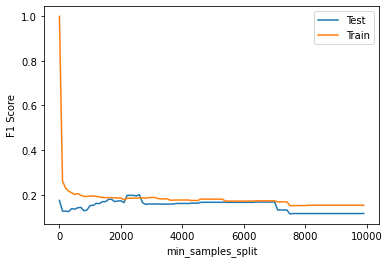

In [171]:
plt.plot(splits,f1_test_list[:100])
plt.plot(splits,f1_train_list[:100])
plt.ylabel('F1 Score')
plt.xlabel('min_samples_split')
plt.legend(['Test','Train'])
plt.savefig('DecsionTreeSplit',dpi=1000)

In [151]:
# Find max point
print(max(f1_test_list))
print(splits[f1_test_list.index(max(f1_test_list))])

0.2007575255195498
2602


In [152]:
# Try max point
decision_bal = DecisionTreeClassifier(criterion= 'entropy', random_state=0,class_weight='balanced',min_samples_split=2600)
start = time.time()
decision_bal.fit(X_train_large, y_train_large)
end = time.time()
pred = decision_bal.predict(X_valid)
decision_bal_score = decision_bal.score(X_valid, y_valid)
f1=f1_score(y_valid, pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
pred_2 = decision_bal.predict(X_train_large)
f1_train=f1_score(y_train_large, pred_2, average='macro',labels=[0.,1.,2.,3.,4.,5.])
f1_train

In [153]:
print(f1_train)
print(f1)

0.23810008965694254
0.16328176563672409


In [164]:
# Try another high point
decision_bal = DecisionTreeClassifier(criterion= 'entropy', random_state=0,class_weight='balanced',min_samples_split=7000)
start = time.time()
decision_bal.fit(X_train_large, y_train_large)
end = time.time()
pred = decision_bal.predict(X_valid)
decision_bal_score = decision_bal.score(X_valid, y_valid)
f1=f1_score(y_valid, pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
pred_2 = decision_bal.predict(X_train_large)
f1_train=f1_score(y_train_large, pred_2, average='macro',labels=[0.,1.,2.,3.,4.,5.])
f1_train

0.2255504100224359

In [165]:
f1

0.168248206543683

In [43]:
# Graph over min_samples_split to try to regularize for balanced data

f1_test_list = []
f1_train_list = []

splits = np.arange(2,10000,1000)

for i in splits:
    # Train on unbalanced data
    decision_bal = DecisionTreeClassifier(criterion= 'entropy', random_state=0,class_weight='balanced',min_samples_split=i)
    start = time.time()
    decision_bal.fit(X_train[:100000], y_train[:100000])
    end = time.time()
    pred = decision_bal.predict(X_valid[:10000])
    decision_bal_score = decision_bal.score(X_valid[:10000], y_valid[:10000])
    f1=f1_score(y_valid[:10000], pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
    pred_2 = decision_bal.predict(X_train[:10000])
    f1_train=f1_score(y_train[:10000], pred_2[:10000], average='macro',labels=[0.,1.,2.,3.,4.,5.])
    f1_train
    f1_test_list.append(f1)
    f1_train_list.append(f1_train)


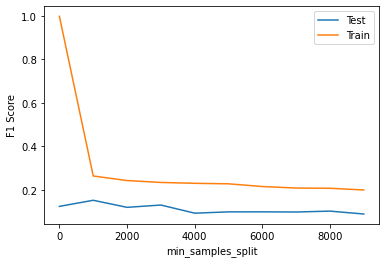

In [44]:
plt.plot(splits,f1_test_list[:100])
plt.plot(splits,f1_train_list[:100])
plt.ylabel('F1 Score')
plt.xlabel('min_samples_split')
plt.legend(['Test','Train'])
plt.savefig('DecsionTreeSplit',dpi=1000)

In [60]:
# Train on full data less features
decision = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
start = time.time()
decision.fit(X_train_less_features, y_train_less_features)
end = time.time()
pred = decision.predict(X_valid_less_features)
decision_score = decision.score(X_valid_less_features, y_valid_less_features)
print('decision_score:', decision_score)
f1=f1_score(y_valid_less_features, pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
print('f1_macro: ', f1)
print("time: ", end-start)

decision_score: 0.5504430021006348
f1_macro:  0.18044866447586347
time:  529.9086799621582


In [67]:
# Graph over min_samples_split to try to regularize for less features

f1_test_list = []
f1_train_list = []

splits = np.arange(2,100000,1000)

for i in splits:
    # Train on unbalanced data
    decision_bal = DecisionTreeClassifier(criterion= 'entropy', random_state=0,class_weight='balanced',min_samples_split=i)
    start = time.time()
    decision_bal.fit(X_train_less_features[:100000], y_train_less_features[:100000])
    end = time.time()
    pred = decision_bal.predict(X_valid_less_features[:10000])
    decision_bal_score = decision_bal.score(X_valid_less_features[:10000], y_valid_less_features[:10000])
    f1=f1_score(y_valid_less_features[:10000], pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
    pred_2 = decision_bal.predict(X_train_less_features[:10000])
    f1_train=f1_score(y_train_less_features[:10000], pred_2[:10000], average='macro',labels=[0.,1.,2.,3.,4.,5.])
    f1_train
    f1_test_list.append(f1)
    f1_train_list.append(f1_train)


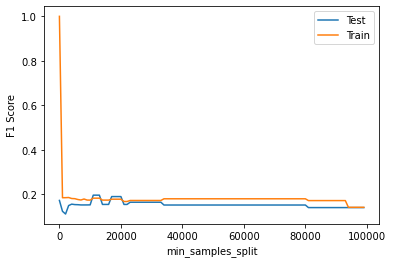

In [68]:
plt.plot(splits,f1_test_list[:100])
plt.plot(splits,f1_train_list[:100])
plt.ylabel('F1 Score')
plt.xlabel('min_samples_split')
plt.legend(['Test','Train'])
plt.savefig('DecsionTreeSplit',dpi=1000)

In [48]:
# Random Forest on Balanced Data

from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=1000,criterion='entropy')
start = time.time()
RandomForest.fit(X_train[:100000], y_train[:100000])
end = time.time()
pred = RandomForest.predict(X_valid[:10000])
RandomForest_score = RandomForest.score(X_valid[:10000], y_valid[:10000])
print('RandomForest_score:', RandomForest_score)
f1=f1_score(y_valid[:10000], pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
print('f1_macro: ', f1)
print("time: ", end-start)

RandomForest_score: 0.459
f1_macro:  0.17312698175924945
time:  608.8082270622253


In [56]:
# Random Forest on Unbalanced Data

from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=1000,criterion='entropy')
start = time.time()
RandomForest.fit(X_train_large[:100000], y_train_large[:100000])
end = time.time()
pred = RandomForest.predict(X_valid[:10000])
RandomForest_score = RandomForest.score(X_valid[:10000], y_valid[:10000])
print('RandomForest_score:', RandomForest_score)
f1=f1_score(y_valid[:10000], pred, average='macro',labels=[0.,1.,2.,3.,4.,5.])
print('f1_macro: ', f1)
print("time: ", end-start)

RandomForest_score: 0.769
f1_macro:  0.1463002736994587
time:  551.4226350784302


C:\Users\jazka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [50]:
# SVM with Balanced Data
pipeline_svm = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight = 'balanced',verbose=True),verbose=True)
model = pipeline_svm.fit(X_train[:100000], y_train[:100000]) 
pred = model.predict(X_valid[:30000]) 
accuracy = f1_score(y_valid[:30000], pred,average='macro',labels=[0.,1.,2.,3.,4.,5.])
print(accuracy)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.1s
[LibSVM][Pipeline] ............... (step 2 of 2) Processing svc, total=18.1min
0.1576586011457768


In [57]:
# SVM with Unbalanced Data
pipeline_svm = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight = 'balanced',verbose=True),verbose=True)
model = pipeline_svm.fit(X_train_large[:100000], y_train_large[:100000]) 
pred = model.predict(X_valid[:30000]) 
accuracy = f1_score(y_valid[:30000], pred,average='macro',labels=[0.,1.,2.,3.,4.,5.])
print(accuracy)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.1s
[LibSVM][Pipeline] ............... (step 2 of 2) Processing svc, total=23.4min
0.15288728944894722


In [69]:
# SVM with less features
pipeline_svm = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight = 'balanced',verbose=True),verbose=True)
model = pipeline_svm.fit(X_train_less_features[:100000], y_train_less_features[:100000]) 
pred = model.predict(X_valid_less_features[:30000]) 
accuracy = f1_score(y_valid_less_features[:30000], pred,average='macro',labels=[0.,1.,2.,3.,4.,5.])
print(accuracy)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[LibSVM][Pipeline] ............... (step 2 of 2) Processing svc, total=20.1min
0.12822321208883156
